Cherenkov_Est myest;


myest.show_expected_photons(1.021, 10); // Example parameters
//myest.show_thresholds_per_momentum();

float length_aerogel = 379.5 ;

myest.show_expected_radii(1.021,10,length_aerogel);

myest.show_expected_photons(1.021,10);


float val = myest.get_expected_radius(myest.kProtonMass, 10, 1.021, length_aerogel);
cout << val << endl;

const char *particle = "electron";
const char *medium  = "aerogel";    
if(std::strcmp(particle,"electron")==0) cout<< "this is electron "<< endl;

TH2D* hxy_electron;
TH2D* hxy_pion;
TH2D* hxy_proton;
TH2D* hxy_kaon;

In [ ]:
#include "cherenkov.h"
void calculate(const char *particle_="electron" ,const char *medium_ = "aerogel", float momentum_ = 10.){
//const char *particle_="muon" 
//const char *medium_ = "gas";
//float momentum_ = 10. ;   
//vector <vecto <float>>;

Cherenkov_Est myest;

    
    
float length_aerogel = 379.5 ;
float length_gas = 1113. ;
cout << "making some montecarlo"<< endl;
float sigma_radius = 2.0;
const char *particle = particle_;
const char *medium  = medium_;
float give_mass = 0; 
float give_index = 0; 
float give_momentum = momentum_;
float give_length = 0;
float give_med_length = 0;

if(std::strcmp(particle,"electron")==0) {
  give_mass =   myest.kElectronMass;
    
}

else if(std::strcmp(particle,"pion")==0) {
  give_mass =   myest.kPionMass;
    
}

else if(std::strcmp(particle,"proton")==0) {
  give_mass =   myest.kProtonMass;
    
}


else if(std::strcmp(particle,"muon")==0) {
  give_mass =   myest.kMuonMass;
    
}

else if(std::strcmp(particle,"kaon")==0) {
  give_mass =   myest.kKaonMass;
    
}

else {
    
    cout << "no valid particle defined "<< endl;
    cout << "use " << "kaon , muon , pion , proton , electron"<< endl;
    //TH2D * emptyhist = TH2D();
    //return ;
}


if(std::strcmp(medium,"aerogel")==0) {
  give_index =   1.021;
  give_length = length_aerogel; //mm
  give_med_length = 4; // mm  
    
}

else if(std::strcmp(medium,"gas")==0) {
  give_index =   1.0008;
  give_length = length_gas; //mm
  give_med_length = 1273;  // mm

   
    
}
else {
    cout << "wrong  medium"<< endl;
    //return ;//emptyhist;
    
}


TH2D* hr_vs_photon = new TH2D("hr_vs_photon"," ;x;y",70,-100,100, 70, -100,100);
TH2D* hxy = new TH2D("hxy"," ;x;y",70,-100,100, 70, -100,100);
    
TH3D* hxyn = new TH3D("hxyn"," ;x;y;n",70,-100,100, 70, -100,100,100, 0,100);    
hxy->Reset();
//hxy->SetName();
float radius_med_ = myest.get_expected_radius(give_mass, give_momentum ,give_index, give_length);    
float exp_photons_ = myest.get_expected_photons(give_index, give_mass, give_momentum);
float exp_photons = exp_photons_ *give_med_length *0.3 *2;// 0.3 is photon detection efficiency of SiPM
float exp_photons_n = exp_photons_ *give_med_length *2;// now removed photon efficiency to introduce this efficiency on the generator  
cout<<" for momentum of "<< give_momentum <<  " GeV/c and for "<< particle <<" expected photons in "<< medium<< " is "  << exp_photons << endl;
cout<<" for momentum of "<< give_momentum <<  " GeV/c and for "<< particle <<" expected radius in  "<< medium << " is " << radius_med_ << endl;


// Seed the random number generator
    std::srand(static_cast<unsigned int>(std::time(nullptr)));

    // Create a random number generator
    std::mt19937 generator(std::rand());

    // Define the distribution for random numbers between -100 and 100
   // std::uniform_int_distribution<int> distribution(-100, 100);
   std::uniform_real_distribution<float> distribution(-100.0f, 100.0f);
    
std::uniform_real_distribution<> dis(0.0, 1.0);    
for(int j =0;j < 1000; j++){
      // cout<< "entering the loop"<< endl;
       for(int i=0; i< int(exp_photons);){
           //int k = 0;
         //  double randomValue = dis(generator);
           //float detector = dis(generator);// decision to detect the photons or not
           //cout<< detector<< endl;
           float random_X = distribution(generator);
           float random_Y = distribution(generator);
           float    rand_rad = TMath::Sqrt(random_X*random_X + random_Y * random_Y);
           if(TMath::Abs(rand_rad- radius_med_)>3.0) continue;
               
                
                   hxy->Fill(random_X , random_Y);
                   hxyn->Fill(random_X , random_Y, exp_photons );
                   i++;
                  
           
               
           // enter the loop if passed the condition
           
       }//photon loop       
          // if (found_hit) j++;
              
              
       
       
   }//event loop
   
//TArc *arc = new TArc(0,0,77.9945);   
//TCanvas *can = new TCanvas("can","",800,800);
//arc->SetFillStyle(0);

//can->cd();

//hist_pion_gas->Draw("COLZ");
//hxy->Draw("COLZ");    

//can->Draw();
hxy->SetName(Form("hist_%s_%s",particle,medium));
hxyn->SetName(Form("hist3_%s_%s",particle,medium));    
cout<< Form("hist_%s_%s",particle,medium)<< endl;
//return hxy;     
} 

In [ ]:
//TH2D* electron_hist = new ("electron_hist"," ;x;y",70,-100,100, 70, -100,100);)

/*vector <float> pi_x_8_aerogel , pi_y_8_aerogel ;
vector <float> mu_x_10_aerogel , mu_y_10_aerogel ;
vector <float> pi_x_10_aerogle , pi_y_10_aerogel ;*/

//calculate("pion" ,"gas", 10.);
calculate("muon" ,"aerogel", 10.);
calculate("pion" ,"aerogel", 10.);
calculate("electron" ,"aerogel", 10.);
calculate("proton" ,"aerogel", 10.);

calculate("kaon" ,"aerogel", 10.);


//cout<< pi_x_8_aerogel.size()<< "    " <<pi_x_8_aerogel.size()<<endl;

In [ ]:
calculate("muon" ,"aerogel", 8.);
calculate("pion" ,"aerogel", 8.);
calculate("electron" ,"aerogel", 8.);
calculate("proton" ,"aerogel", 8.);

calculate("kaon" ,"aerogel", 8.);


In [ ]:
calculate("muon" ,"gas", 8.);
calculate("pion" ,"gas", 8.);
calculate("electron" ,"gas", 8.);
calculate("proton" ,"gas", 8.);

calculate("kaon" ,"gas", 8.);


In [ ]:
calculate("muon" ,"gas", 10.);
calculate("pion" ,"gas", 10.);
calculate("electron" ,"gas", 10.);
calculate("proton" ,"gas", 10.);

calculate("kaon" ,"gas", 10.);


## This is to estimate the background ...... 

In [ ]:
TCanvas *can = new TCanvas("can","",800,800);
//arc->SetFillStyle(0);
gStyle->SetOptStat(0);
can->cd();


//TH2D* hist_pion_aerogel_ = (TH2D*) hist_pion_aerogel->Clone("hist_pion_aerogel_");
//hist3_pion_aerogel->Reset();

hist3_pion_aerogel->Draw("");


hist3_pion_gas->Draw("SAME");

//hist3_kaon_gas->Draw("SAME");
//hist3_proton_gas->Draw("SAME");

//hist3_proton_aerogel->Draw("SAME");

//hist3_electron_aerogel->Draw("SAME");

//hist3_proton_aerogel->Draw("SAME");
//hist_muon_aerogel->Draw("COL");



//hxy_proton->Draw("COLSAME");
//hxy_pion->Draw("COLSAME");
//hxy_kaon->Draw("COLSAME");
//arc->Draw("SAME");
can->SetLeftMargin(0.2);
can->Draw();



In [ ]:
#include "cherenkov.h"
void calculate_bkg(const char *particle_="electron" ,const char *medium_ = "aerogel", float momentum_ = 10.,int nevents = 100){
//const char *particle_="muon" 
//const char *medium_ = "gas";
//float momentum_ = 10. ;   
//vector <vecto <float>>;

Cherenkov_Est myest;

    
    
float length_aerogel = 379.5 ;
float length_gas = 1113. ;
cout << "making some montecarlo"<< endl;
float sigma_radius = 2.0;
const char *particle = particle_;
const char *medium  = medium_;
float give_mass = 0; 
float give_index = 0; 
float give_momentum = momentum_;
float give_length = 0;
float give_med_length = 0;

if(std::strcmp(particle,"electron")==0) {
  give_mass =   myest.kElectronMass;
    
}

else if(std::strcmp(particle,"pion")==0) {
  give_mass =   myest.kPionMass;
    
}

else if(std::strcmp(particle,"proton")==0) {
  give_mass =   myest.kProtonMass;
    
}


else if(std::strcmp(particle,"muon")==0) {
  give_mass =   myest.kMuonMass;
    
}

else if(std::strcmp(particle,"kaon")==0) {
  give_mass =   myest.kKaonMass;
    
}

else {
    
    cout << "no valid particle defined "<< endl;
    cout << "use " << "kaon , muon , pion , proton , electron"<< endl;
    //TH2D * emptyhist = TH2D();
    //return ;
}


if(std::strcmp(medium,"aerogel")==0) {
  give_index =   1.021;
  give_length = length_aerogel; //mm
  give_med_length = 4; // mm  
    
}

else if(std::strcmp(medium,"gas")==0) {
  give_index =   1.0008;
  give_length = length_gas; //mm
  give_med_length = 1273;  // mm

   
    
}
else {
    cout << "wrong  medium"<< endl;
    //return ;//emptyhist;
    
}


TH2D* hr_vs_photon = new TH2D("hr_vs_photon"," ;x;y",70,-100,100, 70, -100,100);
TH2D* hxy = new TH2D("hxy"," ;x;y",70,-100,100, 70, -100,100);
    
TH1D* hrad = new TH1D("hrad"," ;Radius;entries",70,0,200);    
    
TH3D* hxyn = new TH3D("hxyn"," ;x;y;n",70,-100,100, 70, -100,100,100, 0,100);    
hxy->Reset();
hrad->Reset();
hxyn->Reset();    
//hxy->SetName();
float radius_med_2 = myest.get_expected_radius(give_mass, give_momentum ,give_index, give_length);    
float exp_photons_ = myest.get_expected_photons(give_index, give_mass, give_momentum);
float exp_photons = exp_photons_ *give_med_length *0.3 *2;// 0.3 is photon detection efficiency of SiPM
float exp_photons_n = exp_photons_ *give_med_length *2;// now removed photon efficiency to introduce this efficiency on the generator  
cout << "number of events being produced is " << nevents<< endl;
cout<<" for momentum of "<< give_momentum <<  " GeV/c and for "<< particle <<" expected photons in "<< medium<< " is "  << exp_photons << endl;
cout<<" for momentum of "<< give_momentum <<  " GeV/c and for "<< particle <<" expected radius in  "<< medium << " is " << radius_med_2 << endl;


// Seed the random number generator
    std::srand(static_cast<unsigned int>(std::time(nullptr)));

    // Create a random number generator
    std::mt19937 generator(std::rand());

    // Define the distribution for random numbers between -100 and 100
   // std::uniform_int_distribution<int> distribution(-100, 100);
   std::uniform_real_distribution<float> distribution(-100.0f, 100.0f);
   std::uniform_real_distribution<float> dist(0.0f, 1.0f); 
    
std::uniform_real_distribution<> dis(-1, 0.);    
for(int j =0;j < nevents; j++){
       float factor =  dis(generator);
       float est_length= give_length + est_length*factor;
       cout<< "the estimated length is "<< 4*factor << endl;
       float radius_med_ = myest.get_expected_radius(give_mass, give_momentum ,give_index,est_length);
       float prob_forming =  1-TMath::Exp(est_length/33.33);
      // cout<< "entering the loop"<< endl;
       for(int i=0; i< int(exp_photons);){
           //int k = 0;
           float select = dist(generator);
          // cout << select<< endl;
         //  double randomValue = dis(generator);
           //float detector = dis(generator);// decision to detect the photons or not
           //cout<< detector<< endl;
           float random_X = distribution(generator);
           float random_Y = distribution(generator);
           float    rand_rad = TMath::Sqrt(random_X*random_X + random_Y * random_Y);
           
           if(TMath::Abs(rand_rad- radius_med_)>3.0) continue;
           if(select<prob_forming) continue;
               
                
                   hxy->Fill(random_X , random_Y);
                   hxyn->Fill(random_X , random_Y, exp_photons );
                   float produced_rad = TMath::Sqrt(random_X*random_X + random_Y * random_Y);
                   hrad->Fill(produced_rad);
                   i++;
                  
           
               
           // enter the loop if passed the condition
           
       }//photon loop       
          // if (found_hit) j++;
              
              
       
       
   }//event loop
   
//TArc *arc = new TArc(0,0,77.9945);   
//TCanvas *can = new TCanvas("can","",800,800);
//arc->SetFillStyle(0);

//can->cd();

//hist_pion_gas->Draw("COLZ");
//hxy->Draw("COLZ");    

//can->Draw();
hxy->SetName(Form("hist_%s_%s_bkg",particle,medium));
hrad->SetName(Form("hist_rad_%s_%s_bkg",particle,medium));    
hxyn->SetName(Form("hist3_%s_%s_bkg",particle,medium));    
cout<< Form("hist_%s_%s_bkg",particle,medium)<< endl;
//return hxy;     
} 

In [ ]:
calculate_bkg("muon" ,"aerogel", 8.,10);
calculate_bkg("pion" ,"gas", 8.,1000);
calculate_bkg("electron" ,"aerogel", 8.,10);
calculate_bkg("proton" ,"aerogel", 8.,10);

calculate_bkg("kaon" ,"aerogel", 8.,10);

In [ ]:
TCanvas *can = new TCanvas("can","",800,800);
can->Divide(2,2);
//arc->SetFillStyle(0);
gStyle->SetOptStat(0);
can->cd(1);


//TH2D* hist_pion_aerogel_ = (TH2D*) hist_pion_aerogel->Clone("hist_pion_aerogel_");
//hist3_pion_aerogel->Reset();

//hist3_pion_aerogel->Draw("");

hist_pion_gas_bkg->Draw("");

//hist3_pion_gas->Draw("SAME");

//hist3_kaon_gas->Draw("SAME");
//hist3_proton_gas->Draw("SAME");

//hist3_proton_aerogel->Draw("SAME");

//hist3_electron_aerogel->Draw("SAME");

//hist3_proton_aerogel->Draw("SAME");
//hist_muon_aerogel->Draw("COL");



//hxy_proton->Draw("COLSAME");
//hxy_pion->Draw("COLSAME");
//hxy_kaon->Draw("COLSAME");
//arc->Draw("SAME");
can->SetLeftMargin(0.2);


can->cd(2);
TH1D* hist_pion_aerogel_x = (TH1D*) hist_pion_aerogel_bkg->ProjectionX("hist_pion_aerogel_x");
hist_pion_aerogel_x->Draw();

can->cd(3);
TH1D* hist_pion_aerogel_y = (TH1D*) hist_pion_aerogel_bkg->ProjectionX("hist_pion_aerogel_y");
hist_pion_aerogel_x->Draw();

can->cd(4);
//TH1D* hist_pion_aerogel_y = (TH1D*) hist_pion_aerogel->ProjectionX("hist_pion_aerogel_y");
hist_rad_pion_aerogel_bkg->Draw("e");
hist_rad_pion_aerogel_bkg->GetXaxis()->SetRangeUser(30,130);


can->Draw();



In [ ]:
//20231017-194703 10 GeV  polarity Neg
//20231017-190808 8GeV  polarity pos


TFile *En_10_File  = TFile::Open("20231017-190808/recodata.root");

TFile *En_8_File  = TFile::Open("20231017-194703/recodata.root");    

//auto myfile = 
TTree * Ten_Gev_Tree= (TTree*) En_10_File->Get("recodata");

TTree * Eight_Gev_Tree= (TTree*) En_8_File->Get("recodata");
    
 //init branches
float x_10[60000];
float y_10[60000];
float t_10[60000];
UShort_t n_10;
    // set branch address
cout << Ten_Gev_Tree->GetEntries() << endl;
   // TGraphErrors* gr = new TGraphErrors();
Ten_Gev_Tree->SetBranchAddress("x",&x_10);
Ten_Gev_Tree->SetBranchAddress("y",&y_10);
Ten_Gev_Tree->SetBranchAddress("t",&t_10);
Ten_Gev_Tree->SetBranchAddress("n",&n_10);
//tree entry loop
//10 GeV tree Loop  
TGraphErrors * Graph_XY_10 = new TGraphErrors();
int k = 0;

TH2D * xyhist_10 = new TH2D("xyhist_10",";X position; Y position", 60,-100,100,60,-100,100); 

for(int i=0; i<Ten_Gev_Tree->GetEntries();i++){
  
    
   Ten_Gev_Tree->GetEntry(i);
  
   if(i%1000==0)  cout << " x "<< x_10[0] << " y " << y_10[0] << " n "<< n_10 << "  t " << t_10[0]<< " "<< i <<endl;
    
   for(int j = 0; j< n_10 ; j++){
         if((t_10[j])<-10) continue;
       
         if((t_10[j])>30) continue;
       
         Graph_XY_10->SetPoint(k, x_10[j], y_10[j]);
         xyhist_10->Fill(x_10[j], y_10[j]);
          Graph_XY_10->SetPointError(k, 1.5, 1.5);
        //if(j%10==0)  cout << " x "<< x_10[0] << " y " << y_10[0] << " n "<< n_10 << "  t " << t_10[0]<< " "<< i <<endl;
         k ++;
    } 
    
    
}

/*auto chi2Function = [&](const double *par) {
      //minimisation function computing the sum of squares of residuals
      // looping at the graph points
      int np = Graph_XY_10->GetN();
    //  cout<< np<< endl;
      double f = 0;
      double *x = Graph_XY_10->GetX();
      double *y = Graph_XY_10->GetY();
      double *ex = Graph_XY_10->GetEX();
      double *ey = Graph_XY_10->GetEY();
      for (int i=0;i<np;i++) {
         double u = x[i] - par[0];
         double v = y[i] - par[1];
         if( (u ==0 ) || (v==0) )continue;
         double dr = par[2] - std::sqrt(u*u+v*v);
         if(dr<60) continue; 
         double err2 = ((u*u)*(ex[i]*ex[i]) + (v*v)*(ey[i]*ey[i]))/(u*u+v*v);
         //cout << err2<< endl;
         f += dr*dr/err2;
         //cout <<f<< endl;
      }
      return f;
   };

auto chi2Function2 = [&](const double *par) {
      //minimisation function computing the sum of squares of residuals
      // looping at the graph points
      int np = Graph_XY_10->GetN();
    //  cout<< np<< endl;
      double f = 0;
      double *x = Graph_XY_10->GetX();
      double *y = Graph_XY_10->GetY();
      double *ex = Graph_XY_10->GetEX();
      double *ey = Graph_XY_10->GetEY();
      for (int i=0;i<np;i++) {
         double u = x[i] - par[0];
         double v = y[i] - par[1];
         if( (u ==0 ) || (v==0) )continue;
         double dr = par[2] - std::sqrt(u*u+v*v);
         if(dr>40 && dr<20) continue; 
         double err2 = ((u*u)*(ex[i]*ex[i]) + (v*v)*(ey[i]*ey[i]))/(u*u+v*v);
         //cout << err2<< endl;
         f += dr*dr/err2;
         //cout <<f<< endl;
      }
      return f;
   };


ROOT::Math::Functor fcn(chi2Function2,3);
ROOT::Math::Functor fcn2(chi2Function,3);
//ROOT::Math::MinimizerOptions::SetDefaultMaxFunctionCalls(100000);
//ROOT::Math::MinimizerOptions::SetPrintLevel(2)
//ROOT::Math::Minimizer::MaxFunctionCalls(1000);
   ROOT::Fit::Fitter  fitter;
    ROOT::Fit::Fitter  fitter2;
  
   double pStart[3] = {1,2,20};
   double pStart2[3] = {1,2,60};
   fitter.SetFCN(fcn, pStart);
   fitter2.SetFCN(fcn2, pStart2);
   fitter.Config().ParSettings(0).SetName("x0");
   fitter.Config().ParSettings(1).SetName("y0");
   fitter.Config().ParSettings(2).SetName("R");
   
   fitter2.Config().ParSettings(0).SetName("x0");
   fitter2.Config().ParSettings(1).SetName("y0");
   fitter2.Config().ParSettings(2).SetName("R");
   // do the fit 
   bool ok = fitter.FitFCN();
   bool ok2 = fitter2.FitFCN();

   if (!ok) {
      Error("line3Dfit","Line3D Fit failed");
   }  

    if (!ok2) {
      Error("line3Dfit","Line3D Fit failed");
   }  
   const ROOT::Fit::FitResult & result = fitter.Result();
   const ROOT::Fit::FitResult & result2 = fitter2.Result();
   result.Print(std::cout);
   result2.Print(std::cout);
   
   */
   //Draw the circle on top of the points
   

//TArc *arc = new TArc(result.Parameter(0),result.Parameter(1),result.Parameter(2));
  // TArc *arc2 = new TArc(result2.Parameter(0),result2.Parameter(1),result2.Parameter(2));

























TCanvas *can = new TCanvas("can","",800,800);
//can->Divide(2,1);
//can->cd(1);
gStyle->SetOptStat(0);
//can->DrawFrame(-100,-100,100,100);
/*
arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(kRed+3);

arc2->SetFillStyle(0);
arc2->SetLineWidth(2);
arc2->SetLineColor(kBlue+3);
*/

//Graph_XY_10->Draw("Ap");
//arc->Draw("SAME");

can->cd();
can->SetLeftMargin(0.2);
xyhist_10->Draw("COL");
//hist_pion_gas->Draw("SAMECOL");
//arc->Draw("SAME");
//arc2->Draw("SAME");

can->Draw();
//p

In [ ]:
bool is_sensor(float x , float y ) {
    bool in_sensor = true; 
    bool inregion = false;
    if(x>-35 && x <35 && y>-35 && y<-35 ) inregion=true;
    
    
}


In [ ]:
//20231017-194703 10 GeV  polarity Neg
//20231017-190808 8GeV  polarity pos
float est_centx = 0.2;
float est_centy  =0.2;
TFile *En_10_File  =  TFile::Open("20231017-190808/recodata.root");

TFile *En_8_File  = TFile::Open("20231017-194703/recodata.root");    


TTree * Ten_Gev_Tree= (TTree*) En_10_File->Get("recodata");

TTree * Eight_Gev_Tree= (TTree*) En_8_File->Get("recodata");
    
 //init branches
float x_10[60000];
float y_10[60000];
float t_10[60000];
UShort_t n_10;

    // set branch address
cout << Ten_Gev_Tree->GetEntries() << endl;
   // TGraphErrors* gr = new TGraphErrors();
Ten_Gev_Tree->SetBranchAddress("x",&x_10);
Ten_Gev_Tree->SetBranchAddress("y",&y_10);
Ten_Gev_Tree->SetBranchAddress("t",&t_10);
Ten_Gev_Tree->SetBranchAddress("n",&n_10);
//tree entry loop
//10 GeV tree Loop


TGraphErrors * Graph_XY_10 = new TGraphErrors();
TH1F * Est_Dist = new TH1F("Est_Dist",";Estimated Radius;Number of Photons/Event",33,0,100);// just to estimate the radius using 0,0 center 
TH2F * Est_Dist_V_Photon = new TH2F("Est_Dist_V_Photon",";Estimated Radius;Number of Photons/Event",40,30,90,100,0,100);// just to estimate the radius using 0,0 center 
TH1F * Est_Radius = new TH1F("Est_Radius",";Estimated Radius;Number of Photons",25,20,100);// just to estimate the radius using 0,0 center 
TH1F * hNumber_of_Photons = new TH1F("hNumber_of_Photons",";Number of Photons; Entries",100,0,100);// just to estimate the radius using 0,0 center 
TH1F * hTime = new TH1F("hTime",";Time;Number of Photons",200,-100,100);// this is the time
TH2F * hNX = new TH2F("hNX",";X;Number of Photons",30,-100,100,100,0,100 );// this is the x vs n 
TH2F * hNY = new TH2F("hNY",";Y;Number of Photons",30,-100,100,100,0,100 );// this is the y vs n
TH1F * hX = new TH1F("hX",";X;Entries",30,-100,100);// this is the x vs n 
TH1F * hY = new TH1F("hY",";Y;Entries",30,-100,100);// this is the x vs n 


int k = 0;

TH2D * xyhist_10 = new TH2D("xyhist_10",";X position; Y position", 80,-100,100,80,-100,100); 

for(int i=0; i<Ten_Gev_Tree->GetEntries();i++){
    
   Ten_Gev_Tree->GetEntry(i);
   //hNumber_of_Photons->Fill(n_10);  
   if(i%1000==0)  cout << " x "<< x_10[0] << " y " << y_10[0] << " n "<< n_10 << "  t " << t_10[0]<< " "<< i <<endl;
   float sum_Rad = 0;
   //if(n_10<5) continue;
   //if(n_10<55) continue; 
   //if(n_10>20) continue; 
    bool has_outring = false;
    bool has_inring = false; 
    bool has_midring = false;
    bool has_hidring = false;
    
  
   for(int j = 0; j< n_10 ; j++){
        
        // if(TMath::Abs(t_10[j])>10) continue;  
        // if(TMath::Abs(t_10[j])>20) continue;
         //if((t_10[j])<-10) continue;
       
         if(TMath::Abs(t_10[j])>20) continue;  
         
         float Rad = TMath::Sqrt((x_10[j]-est_centx)* (x_10[j]-est_centx) + (y_10[j]-est_centy)*(y_10[j]-est_centy));
         //if((n_10> 18&& n_10<65) && (Rad>66 && Rad<78)) {
         if((Rad>66 && Rad<78)) {
             has_outring = true;
         }
       
        // if((n_10>18 && n_10<65.) && (Rad>30 && Rad<50)) {
         if((Rad>30 && Rad<50)) {    
             has_inring = true;
         }
       
        //if((n_10<20 && n_10>3.)&&(Rad>54 && Rad<66)) {
        if((Rad>54 && Rad<66)) {
             has_midring = true;
         }
       
       
       // if((n_10<20. && n_10>3.) && (Rad>66 && Rad<74)) {
       if((Rad>66 && Rad<74)) {
             has_hidring = true;
         }
         //if(has_midring || has_outring||has_inring||has_hidring) continue;
         //if(has_midring || has_outring||has_inring) continue;
        //if(has_outring||has_inring) continue;
         //if(has_hidring) continue;
         //if(has_inring ||has_outring ) continue;
       //if(!has_outring&&!has_inring){
       //if(!has_midring || !has_outring){
      // if(!has_inring&& !has_outring){
         Est_Dist->Fill(Rad);
         sum_Rad = sum_Rad + Rad;
         
         Est_Dist_V_Photon->Fill(Rad,n_10);
         hTime->Fill(t_10[j]);  
         xyhist_10->Fill(x_10[j], y_10[j]);  
      // }
         
         hNX->Fill(x_10[j], n_10);
         hNY->Fill(y_10[j], n_10);
         hX->Fill(x_10[j]);
         hY->Fill(y_10[j]);
        
         Graph_XY_10->SetPoint(k, x_10[j], y_10[j]);
         
         Graph_XY_10->SetPointError(k, 1.5, 1.5);
         //cout<<"hello" <<sum_Rad<< endl;   
        //if(j%10==0)  cout << " x "<< x_10[0] << " y " << y_10[0] << " n "<< n_10 << "  t " << t_10[0]<< " "<< i <<endl;
         k ++;
        
    }
    //if(has_midring||has_outring||has_inring||has_hidring) continue;
   // if(has_outring||has_inring) continue;
      //if(!has_inring&& has_outring){
   // if(has_inring&& !has_outring){
    hNumber_of_Photons->Fill(n_10); 
    float av_rad = sum_Rad/n_10;
    Est_Radius->Fill(av_rad); 
   //   }
}//end of entries
TCanvas *can = new TCanvas("can","",1600,800);
can->Divide(2,1);
can ->cd(1);
//hNX->Draw("surf");
hX->Draw();
//Est_Dist_V_Photon->Draw("colz");
can ->cd(2);

gPad->SetLeftMargin(0.1);
//hNumber_of_Photons->Draw();
//hNY->Draw("surf");
hY->Draw("");
//can->SetLogy();
can->Draw();

In [ ]:
TCanvas *can = new TCanvas("can","",1600,800);
TArc *arc = new TArc(0,0,70);
arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(kRed+3);

can->Divide(2,1);
can->cd(1);
//can->DrawFrame(-100,-100,100,100);
/*
arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(kRed+3);

arc2->SetFillStyle(0);
arc2->SetLineWidth(2);
arc2->SetLineColor(kBlue+3);
*/

//Graph_XY_10->Draw("Ap");
//arc->Draw("SAME");
Est_Dist_V_Photon->Draw("col");
can->cd(2);
gPad->SetLeftMargin(0.2);
xyhist_10->Draw("COLZ");
//arc->Draw("SAME");
//arc2->Draw("SAME");

can->Draw();
//p



TCanvas *can2 = new TCanvas("can2","",800,800);
can2->cd();
TH1D * xproj = Est_Dist_V_Photon->ProjectionX("xproj");
xproj->Draw()
can2->Draw();

In [ ]:
TCanvas *can = new TCanvas("can","",1600,800);
can->Divide(2,1);

can->cd(1);
gPad->SetLeftMargin(0.2);
Est_Radius->SetLineColor(kBlue+3);
Est_Radius->SetLineWidth(2);

Est_Radius->Draw();

can->cd(2);

Est_Dist->Draw();
Est_Radius->SetLineColor(kGreen+3);
Est_Radius->SetLineWidth(2);
can->Draw();

In [ ]:
TCanvas *can = new TCanvas("can","",1600,1600);
can ->cd();
hTime->Draw();


can->SetLogy();
can->Draw();

In [ ]:
gStyle->SetOptStat(0);
TCanvas *can = new TCanvas("can","",1600,800);

TArc *arc_low = new TArc(42,35,7);


TArc *arc_mid = new TArc(60,12,7);
TArc *arc_high = new TArc(72,35,6);
arc_low->SetFillStyle(0);
arc_low->SetLineColor(kRed+3);
arc_low->SetLineWidth(3);

arc_mid->SetFillStyle(0);
arc_mid->SetLineColor(kBlue+3);
arc_mid->SetLineWidth(3);

arc_high->SetFillStyle(0);
arc_high->SetLineColor(42);
arc_high->SetLineWidth(3);

//can->Divide(2,1);
can ->cd();
Est_Dist_V_Photon->Draw("COL");
arc_low->Draw("SAME");
arc_mid->Draw("SAME");
arc_high->Draw("SAME");
can->Draw();
//can->BuildLegend(0.5,0.6,0.8,.9);


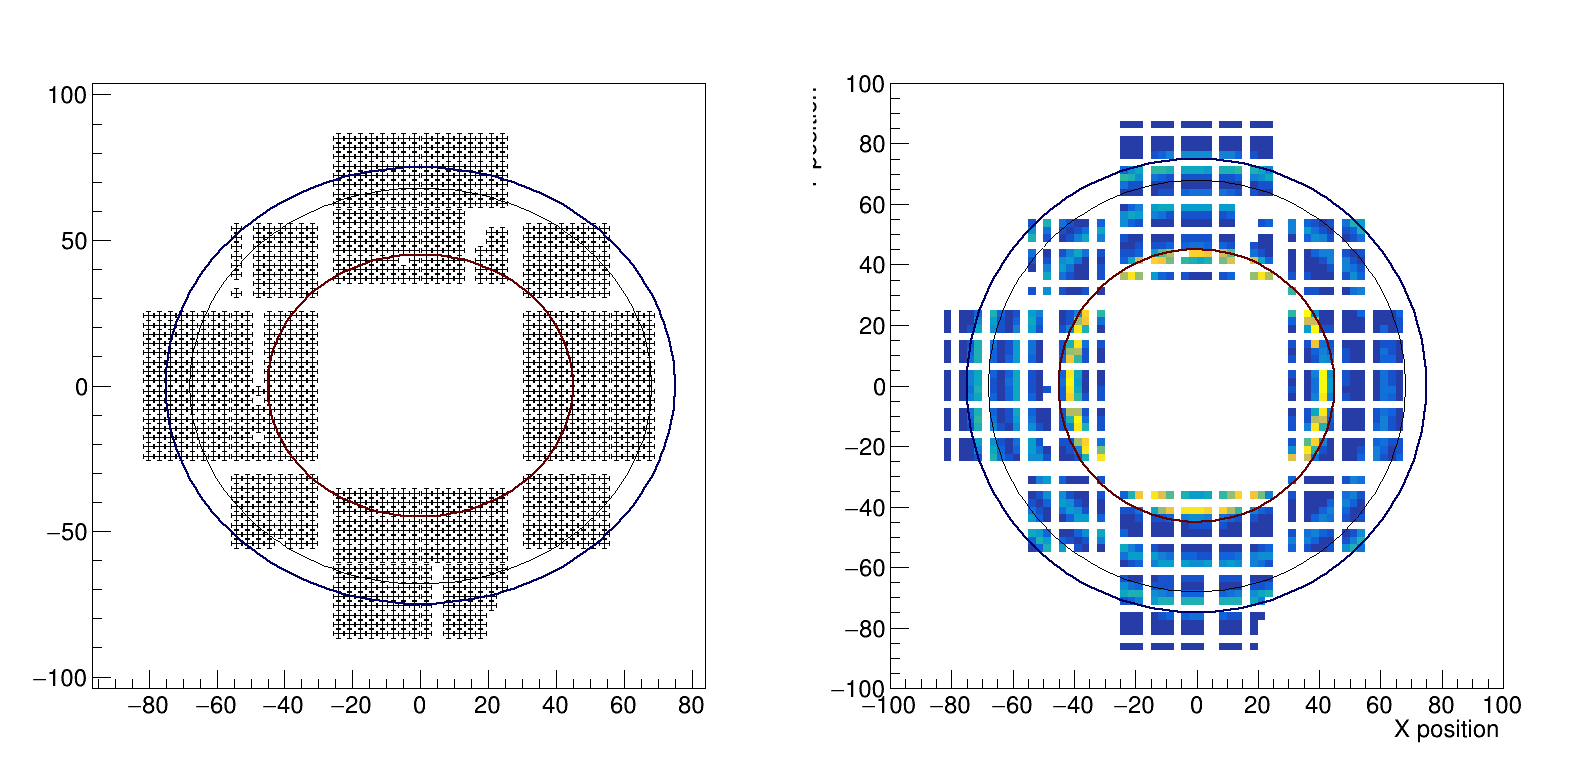

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [12]:
TArc *arc = new TArc(0,0,45);
TArc *arc2 = new TArc(0,0,75);

TArc *arc3 = new TArc(0,0,68);

TCanvas *can = new TCanvas("can","",1600,800);
can->Divide(2,1);
can->cd(1);
//can->DrawFrame(-100,-100,100,100);

arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(kRed+3);

arc2->SetFillStyle(0);
arc3->SetFillStyle(0);
arc2->SetLineWidth(2);
arc2->SetLineColor(kBlue+3);


Graph_XY_10->Draw("Ap");
arc->Draw("SAME");
arc2->Draw("SAME");
arc3->Draw("SAME");


can->cd(2);
xyhist_10->Draw("COL");
arc->Draw("SAME");
arc2->Draw("SAME");
arc3->Draw("SAME");

can->Draw();
//p

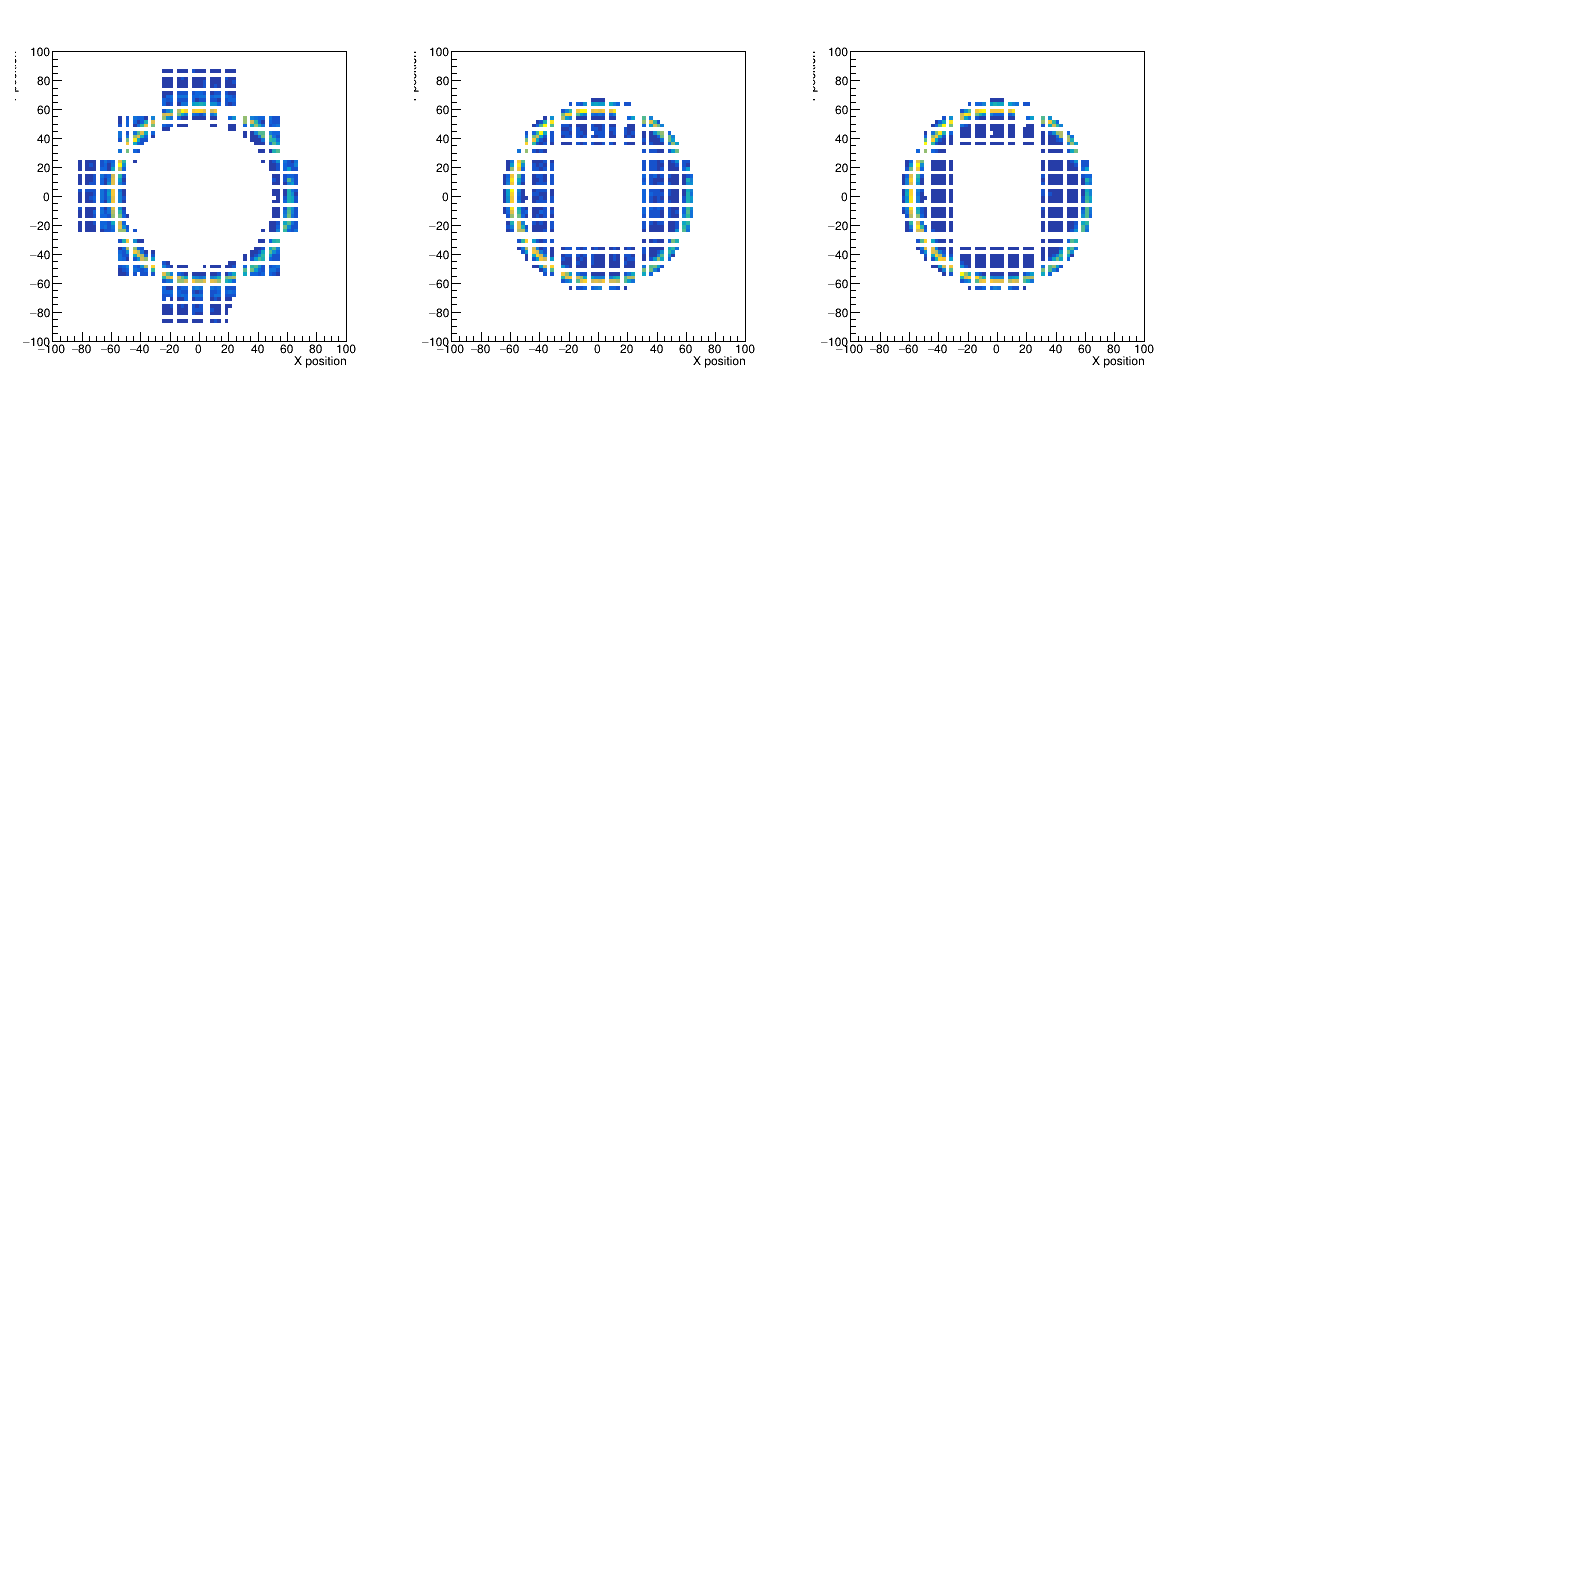

19192


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [13]:
//20231017-194703 10 GeV  polarity Neg
//20231017-190808 8GeV  polarity pos
float est_centx = 0.2;
float est_centy  =0.2;
TFile *En_10_File  =  TFile::Open("20231017-190808/recodata.root");

TFile *En_8_File  = TFile::Open("20231017-194703/recodata.root");    



// file to analyze 
TFile *File;

bool debug = false;
File = En_10_File;



TTree * _Tree= (TTree*) File->Get("recodata");

//TTree * Eight_Gev_Tree= (TTree*) En_8_File->Get("recodata");
    
 //init branches
float x_10[60000];
float y_10[60000];
float t_10[60000];
UShort_t n_10;

    // set branch address
cout << _Tree->GetEntries() << endl;
   // TGraphErrors* gr = new TGraphErrors();
_Tree->SetBranchAddress("x",&x_10);
_Tree->SetBranchAddress("y",&y_10);
_Tree->SetBranchAddress("t",&t_10);
_Tree->SetBranchAddress("n",&n_10);
//tree entry loop
//10 GeV tree Loop


TGraphErrors * Graph_XY_10 = new TGraphErrors();
TH1F * Est_Dist = new TH1F("Est_Dist",";Estimated Radius;Number of Photons/Event",33,0,100);// just to estimate the radius using 0,0 center 
TH2F * Est_Dist_V_Photon = new TH2F("Est_Dist_V_Photon",";Estimated Radius;Number of Photons/Event",20,30,90,100,0,100);// just to estimate the radius using 0,0 center 
TH1F * Est_Radius = new TH1F("Est_Radius",";Estimated Radius;Number of Photons",25,20,100);// just to estimate the radius using 0,0 center 
TH1F * hNumber_of_Photons = new TH1F("hNumber_of_Photons",";Number of Photons; Entries",100,0,100);// just to estimate the radius using 0,0 center 
TH1F * hTime = new TH1F("hTime",";Time;Number of Photons",200,-100,100);// this is the time
TH2F * hNX = new TH2F("hNX",";X;Number of Photons",30,-100,100,100,0,100 );// this is the x vs n 
TH2F * hNY = new TH2F("hNY",";Y;Number of Photons",30,-100,100,100,0,100 );// this is the y vs n
TH1F * hX = new TH1F("hX",";X;Entries",30,-100,100);// this is the x vs n 
TH1F * hY = new TH1F("hY",";Y;Entries",30,-100,100);// this is the x vs n 


int k = 0;

TH2D * xyhist_10 = new TH2D("xyhist_10",";X position; Y position", 80,-100,100,80,-100,100);

TH2D * xyhist_inoutring = new TH2D("xyhist_inoutring",";X position; Y position", 80,-100,100,80,-100,100);

TH2D * xyhist_outring_only = new TH2D("xyhist_outring_only",";X position; Y position", 80,-100,100,80,-100,100);

TH2D * xyhist_inring_only = new TH2D("xyhist_inring_only",";X position; Y position", 80,-100,100,80,-100,100);

TH2D * xyhist_midring_only = new TH2D("xyhist_midring_only",";X position; Y position", 80,-100,100,80,-100,100);

for(int i=0; i<_Tree->GetEntries();i++){
   int nhit_outring = 0;
   int nhit_inring =0;
   int nhit_bothring =0;
   int nhist_bothring =0; 
   _Tree->GetEntry(i);
   //hNumber_of_Photons->Fill(n_10);  
    
    
   if(i%1000==0&& debug)  cout << " x "<< x_10[0] << " y " << y_10[0] << " n "<< n_10 << "  t " << t_10[0]<< " "<< i <<endl;
   float sum_Rad = 0;
   //if(n_10<5) continue;
   //if(n_10>55) continue; 
   //if(n_10>20) continue; 
    bool has_outring = false;
    bool has_inring = false; 
    bool has_midring = false;
    bool has_hidring = false;
    
  
   for(int j = 0; j< n_10 ; j++){
        
        //estimated  of each point distance from origin 
        float Rad = TMath::Sqrt((x_10[j]-est_centx)* (x_10[j]-est_centx) + (y_10[j]-est_centy)*(y_10[j]-est_centy));
 
       //applying some selection of the radius to select event with both
        if((Rad>66)) {
             has_outring = true;
         }
       
        // if((n_10>18 && n_10<65.) && (Rad>30 && Rad<50)) {
         if((Rad<50)) {    
             has_inring = true;
         }
       
        //if((n_10<20 && n_10>3.)&&(Rad>54 && Rad<66)) {
        if((Rad>54 && Rad<66)) {
             has_midring = true;
         }
       
       
       // if((n_10<20. && n_10>3.) && (Rad>66 && Rad<74)) {
       if((Rad>66 && Rad<74)) {
             has_hidring = true;
         }
         
       
      //  k ++;
        
    }
    
    if(has_outring && !has_inring ){
         for(int j = 0; j< n_10 ; j++){
            if(TMath::Abs(t_10[j])>20) continue; 
            xyhist_outring_only-> Fill(x_10[j], y_10[j]);
         }  
    }// only outer ring 
        
     if(!has_outring && has_inring ){
         for(int j = 0; j< n_10 ; j++){
            if(TMath::Abs(t_10[j])>20) continue; 
            xyhist_inring_only-> Fill(x_10[j], y_10[j]);
         }  
    }// only inner ring     
        
     if(!has_outring && !has_inring && has_midring){
         for(int j = 0; j< n_10 ; j++){
            if(TMath::Abs(t_10[j])>20) continue; 
            xyhist_midring_only-> Fill(x_10[j], y_10[j]);
         }   
    }// only outer ring 
    
    
    if(!has_outring){
         for(int j = 0; j< n_10 ; j++){
            if(TMath::Abs(t_10[j])>20) continue; 
            xyhist_midring_only-> Fill(x_10[j], y_10[j]);
         }   
    }// only outer ring 
    
    

}//end of entries


TCanvas *can = new TCanvas("can","",1600,1600);
can->Divide(4,4);
can ->cd(1);
xyhist_outring_only->Draw();
can ->cd(2);
xyhist_inring_only->Draw();    
can ->cd(3);
xyhist_midring_only->Draw();    

//Est_Dist_V_Photon->Draw("colz");
can ->cd(2);
can->Draw();
